<light>First some imports we need</light>

In [13]:
import operator, math, random
import numpy

from IPython.display import Image
from deap import base, creator, tools, gp, algorithms
from helper import plot, plot_tree

<h2>1. Defining the PrimitiveSet Object</h2>
<p>
    In this first step we define the PrimitiveSet <code>pset</code>. The <code>pset</code> contains  the base functions, constants and the definition of input parameters. In following steps trees are     build out of these components.
</p>
</br>
<p>
    Generate a PrimitiveSetType Object with two input parameters (first one is a boolean and second one is a float). The return value of the result (the root node in the tree) should be a float value.
</p>

In [14]:
pset = gp.PrimitiveSetTyped("main", [bool, float], float)

Define a custom function

In [15]:
def if_then_else(input, output1, output2):
    return output1 if input else output2

Define primitive functions for the nodes. The first parameter defines the function, the second the types of the input parameters and the third one the type of the output.

In [16]:
pset.addPrimitive(operator.xor, [bool, bool], bool)
pset.addPrimitive(operator.mul, [float, float], float)
pset.addPrimitive(if_then_else, [bool, float, float], float)

Secondly define some constants for the terminals (leafs in the tree)

In [17]:
pset.addTerminal(3.0, float)
pset.addTerminal(1, bool)

Define names for the input parameters

In [18]:
pset.renameArguments(ARG0="x")
pset.renameArguments(ARG1="y")

<h2>2. Generation of Tree Individuals</h2>
<p>

To generate valid individuals we need to create the <code>Fitness</code> and <code>Individuals</code> classes. We also add a reference to the previously generated PrimitiveSet object.

</p>

In [19]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin,
               pset=pset)

/Users/tillhoffmann/Projects/uni/heuristic-algorithms/first-deap-test/venv/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/tillhoffmann/Projects/uni/heuristic-algorithms/first-deap-test/venv/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Register the functions into a toolbox.

In [20]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.expr)

<h2>3. Evaluation of trees</h2>

In [21]:
expr = gp.genFull(pset, min_=1, max_=3)
tree = gp.PrimitiveTree(expr)
str(tree)

'if_then_else(xor(1, 1), mul(3.0, 3.0), mul(3.0, 3.0))'

In [22]:
function = gp.compile(tree, pset)
function(1, 2)

9.0

<h2>4. Plotting a tree</h2>

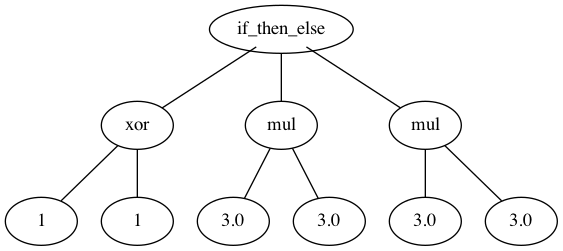

In [26]:
nodes, edges, labels = gp.graph(expr)
plot_tree(nodes, edges, labels)

Image(filename='tree.png')              # displays the image